In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [15]:
df = pd.read_csv("Datasets/compiledDataset.csv")

In [16]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [17]:
df.head()

,age,sex,fever,cough,fatigue,abdominal pain,diarrhea,malaise,pneumonia,aching muscles,...,runny nose,difficulty walking,sputum,pneumonitis,physical discomfort,toothache,wheezing,dry mouth,sweating,covid_19
0,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,75,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
corrDF = df.corr()
corrDF

,age,sex,fever,cough,fatigue,abdominal pain,diarrhea,malaise,pneumonia,aching muscles,...,runny nose,difficulty walking,sputum,pneumonitis,physical discomfort,toothache,wheezing,dry mouth,sweating,covid_19
age,1.000000,-0.008224,0.381762,0.194963,-0.077859,-0.093597,-0.049520,-0.157432,0.074913,-0.156264,...,-0.119675,0.001034,-0.036097,0.024704,0.027267,0.030036,0.008495,0.016477,-0.006584,0.563554
sex,-0.008224,1.000000,-0.076239,0.020759,0.039158,0.061743,0.007002,-0.065227,-0.009179,-0.004992,...,0.070738,-0.013473,-0.017619,0.024917,0.008197,-0.034881,0.046465,0.114278,0.046465,-0.015097
fever,0.381762,-0.076239,1.000000,0.165233,-0.182886,-0.094625,-0.034016,-0.191891,0.027916,-0.170135,...,-0.058382,-0.034797,-0.122976,-0.203243,-0.009152,0.034309,0.034309,-0.082758,-0.047240,0.647848
cough,0.194963,0.020759,0.165233,1.000000,-0.078041,-0.040088,0.013447,-0.087441,-0.039705,-0.012950,...,0.041454,-0.047599,0.129519,-0.118041,0.022388,-0.027437,-0.027437,0.003443,0.059073,0.250069
fatigue,-0.077859,0.039158,-0.182886,-0.078041,1.000000,0.062005,0.072323,0.262449,-0.054537,0.179480,...,0.028618,0.126607,0.064157,-0.059891,-0.019703,-0.013921,-0.013921,0.019194,-0.013921,-0.262106
abdominal pain,-0.093597,0.061743,-0.094625,-0.040088,0.062005,1.000000,0.101236,0.248612,-0.016882,0.071571,...,-0.022878,0.212523,0.036255,0.072391,-0.006099,-0.004309,-0.004309,-0.010598,-0.004309,-0.119768
diarrhea,-0.049520,0.007002,-0.034016,0.013447,0.072323,0.101236,1.000000,0.049817,-0.021232,0.041678,...,0.031098,-0.009402,-0.034457,-0.023316,-0.007671,-0.005420,-0.005420,-0.013329,-0.005420,0.017720
malaise,-0.157432,-0.065227,-0.191891,-0.087441,0.262449,0.248612,0.049817,1.000000,-0.008236,0.254053,...,0.023675,0.150028,0.022863,-0.051389,-0.016906,0.135690,-0.011945,-0.029377,-0.011945,-0.294159
pneumonia,0.074913,-0.009179,0.027916,-0.039705,-0.054537,-0.016882,-0.021232,-0.008236,1.000000,-0.013936,...,-0.033711,-0.011016,-0.040371,-0.027318,-0.008987,0.255253,-0.006350,-0.015617,-0.006350,0.088112
aching muscles,-0.156264,-0.004992,-0.170135,-0.012950,0.179480,0.071571,0.041678,0.254053,-0.013936,1.000000,...,0.013945,-0.022263,0.058084,-0.055210,-0.018163,-0.012833,-0.012833,-0.031561,0.126299,-0.229082


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop("covid_19",axis=1)
y = df["covid_19"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Benchmarking with a Simple Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
from sklearn.metrics import classification_report
print("-"*30)

y_pred = log_reg.predict(X_train)
print("Logistic Regression - Training set")
print("-"*30)
print(classification_report(y_train, y_pred))

print("-"*30)

y_pred = log_reg.predict(X_test)
print("Logistic Regression - Test set")
print("-"*30)
print(classification_report(y_test, y_pred))

------------------------------
Logistic Regression - Training set
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       115
           1       1.00      0.98      0.99       379

    accuracy                           0.98       494
   macro avg       0.97      0.99      0.98       494
weighted avg       0.98      0.98      0.98       494

------------------------------
Logistic Regression - Test set
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.99      0.96      0.97        92

    accuracy                           0.96       124
   macro avg       0.94      0.96      0.95       124
weighted avg       0.96      0.96      0.96       124



# SVM Classifier

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
from sklearn.metrics import classification_report
print("-"*30)

y_pred = svc.predict(X_train)
print("SVM - Training set")
print("-"*30)
print(classification_report(y_train, y_pred))

print("-"*30)

y_pred = svc.predict(X_test)
print("SVM - Test set")
print("-"*30)
print(classification_report(y_test, y_pred))



------------------------------
SVM - Training set
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       115
           1       0.98      0.98      0.98       379

    accuracy                           0.97       494
   macro avg       0.96      0.95      0.95       494
weighted avg       0.97      0.97      0.97       494

------------------------------
SVM - Test set
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.98      0.98      0.98        92

    accuracy                           0.97       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.97      0.97      0.97       124



In [28]:
accuracy_score(y_test, y_pred)

0.967741935483871

In [29]:
df.columns

Index(['age', 'sex', 'fever', 'cough', 'fatigue', 'abdominal pain', 'diarrhea',
       'malaise', 'pneumonia', 'aching muscles', 'anorexia', 'asymptomatic',
       'chest discomfort', 'dyspnea', 'nausea', 'vomitting', 'chills',
       'conjuctivitis', 'joint pain', 'headache', 'weakness', 'sore throat',
       'sneezing', 'rhinorrhea', 'dizziness', 'runny nose',
       'difficulty walking', 'sputum', 'pneumonitis', 'physical discomfort',
       'toothache', 'wheezing', 'dry mouth', 'sweating', 'covid_19'],
      dtype='object')

In [30]:
# save the model to disk
filename = './Models/svmModel.sav'
pickle.dump(svc, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
print(result)

0.967741935483871


# Standardize the Data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
features = X.columns
feat = X

# Separating out the features
x = feat.loc[:, features].values

# Separating out the target
y = df.loc[:,['covid_19']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA Projection to 2D

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [34]:
principalDf.head()

,principal component 1,principal component 2
0,0.848896,-1.660634
1,-0.218456,-1.265127
2,0.415898,0.323585
3,-0.393209,-0.686355
4,-1.478611,0.591800


In [35]:
finalDf = pd.concat([principalDf, df[['covid_19']]], axis = 1)

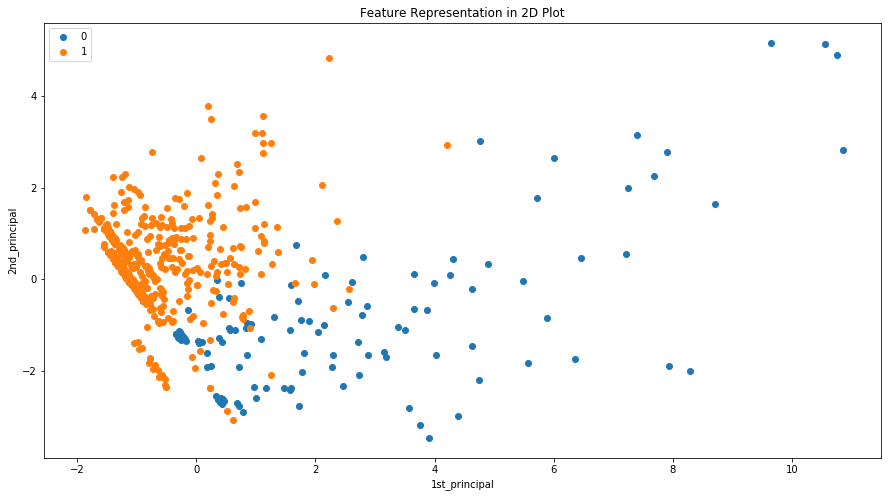

In [36]:
plt.figure(figsize=(15, 8))
label = np.array(df.covid_19)
for i in set(label):
    d = finalDf[label == i]
    plt.scatter(x=d['principal component 1'], y=d['principal component 2'], label=i)

plt.xlabel("1st_principal")
plt.ylabel("2nd_principal")
plt.title("Feature Representation in 2D Plot")
plt.legend()

In [37]:
inpDF = pd.DataFrame(np.nan, index=[0], columns=['Clickbaits'])
inpDF

,Clickbaits
0,NaN
